# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**12

seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname='quantization')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [5]:
!ls -l {shl.data_cache}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    2978037 Mar 14 02:10 data_cache/coding_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2978037 Mar 15 14:07 data_cache/coding_HEH_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2978038 Mar 14 00:24 data_cache/coding_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  231154688 Mar 17 15:38 data_cache/coding_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 441)
average of patches =  6.120844073278042e-05  +/-  0.004903761065625913
average energy of data =  0.1903016086451367 +/- 0.07031163101870555


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (529, 441)
average of filters =  1.8109214709682568e-05 +/- 0.0009297466993725294
average energy of filters =  1.0 +/- 9.133219749777853e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (529, 441)
average of filters =  9.980837813310183e-07 +/- 0.0009171938668737892
average energy of filters =  1.0 +/- 9.082052849979712e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (529, 441)
average of filters =  -6.951178064428648e-06 +/- 0.0008735922884190306
average energy of filters =  1.0 +/- 9.18410159055527e-17


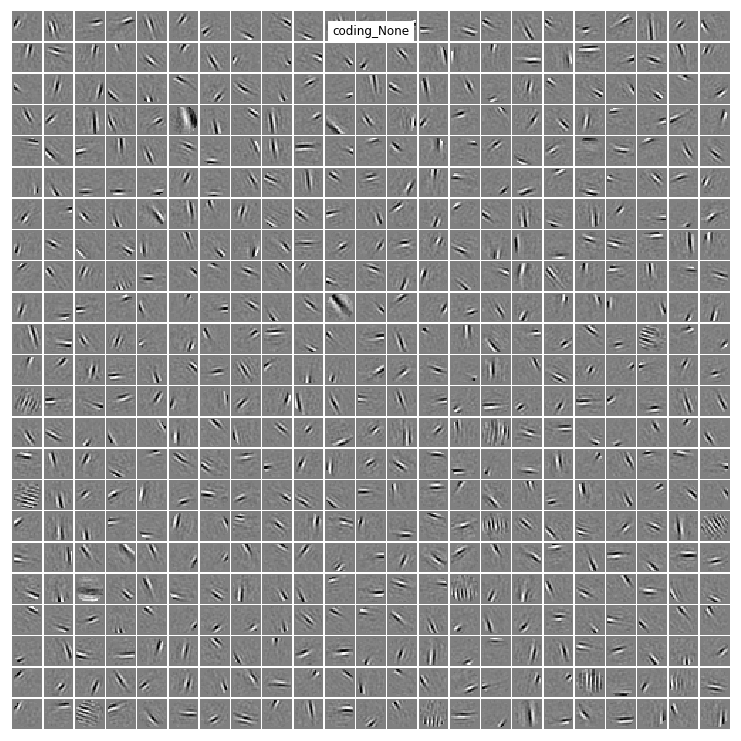

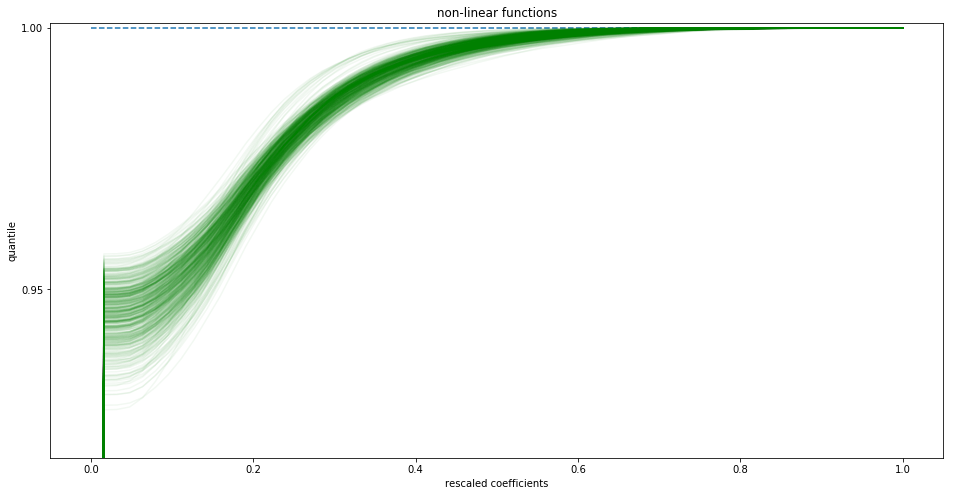

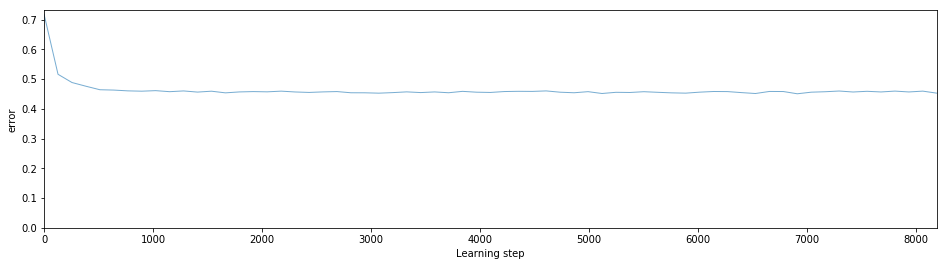

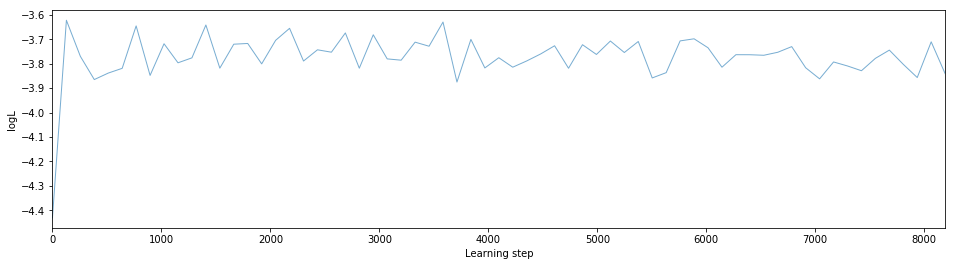

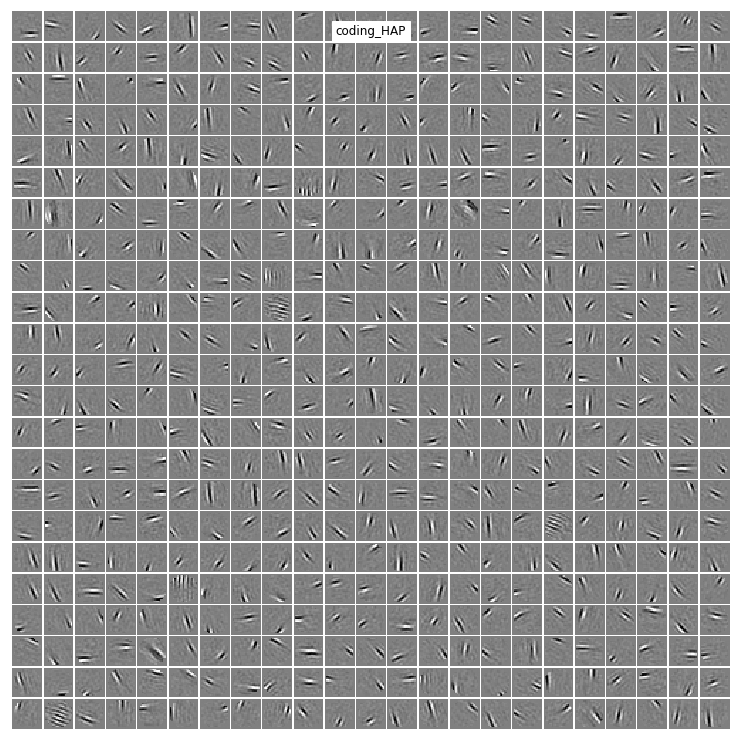

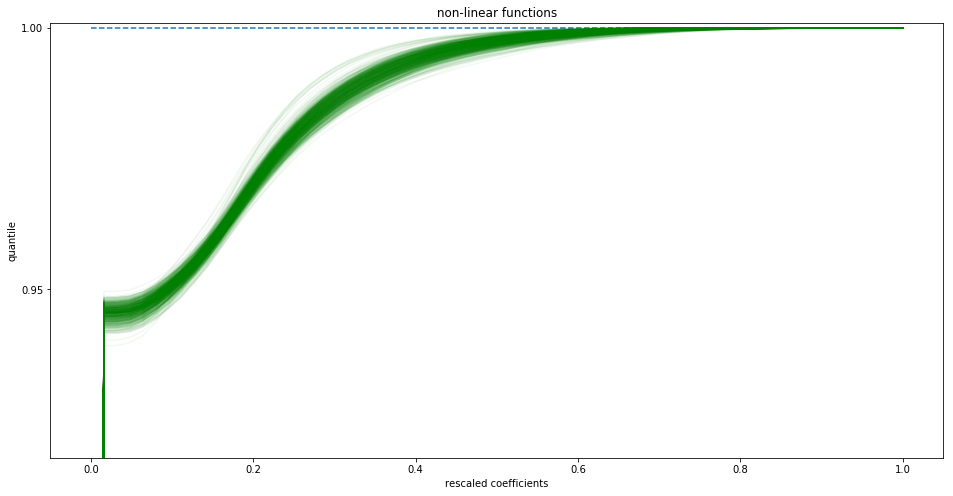

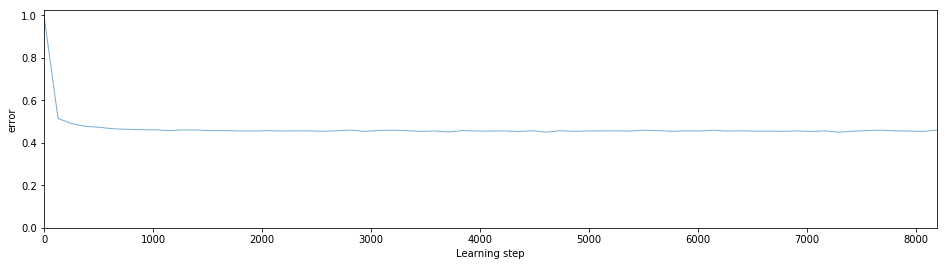

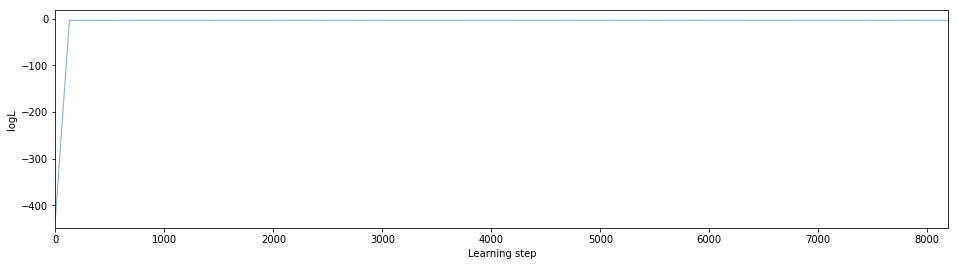

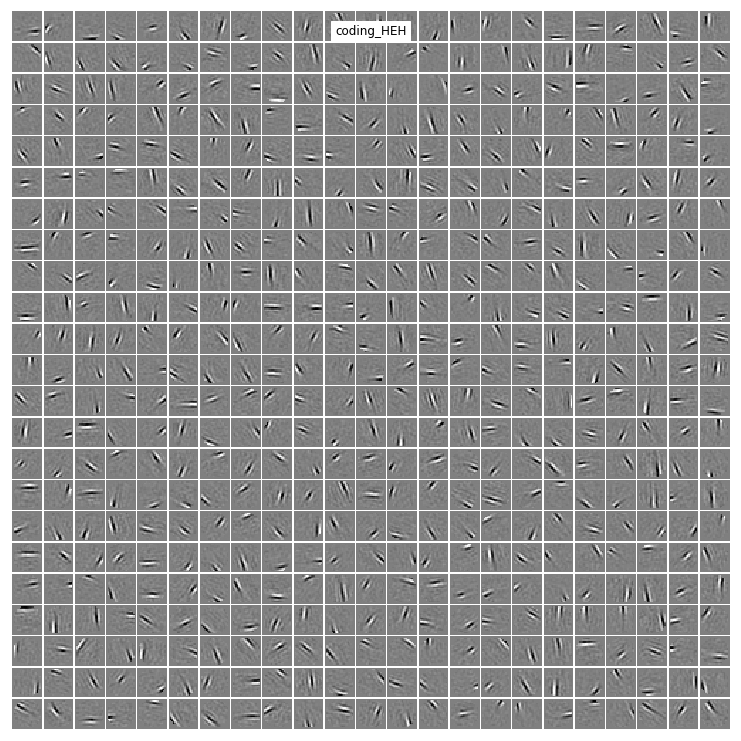

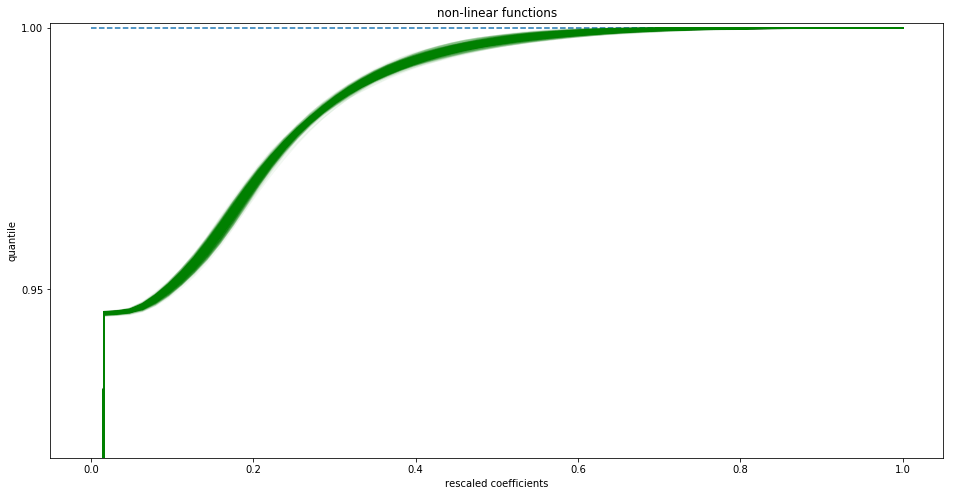

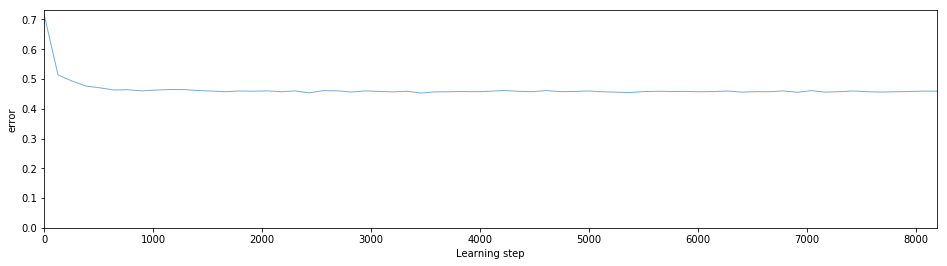

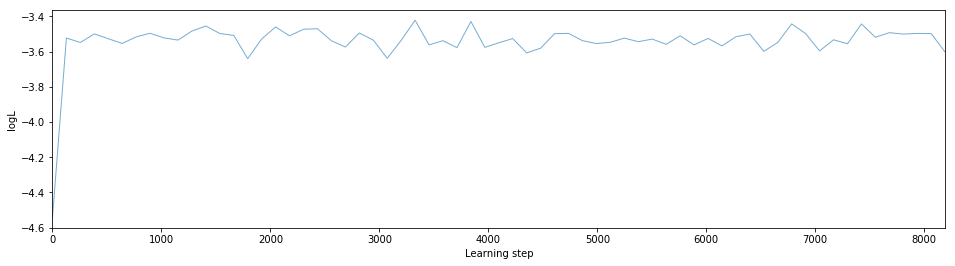

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.031917458486709224
average std of codewords =  0.1625318273646943
l0-sparseness of codewords =  0.05458227492911153
std of the average of individual patches =  0.0039020483633449357


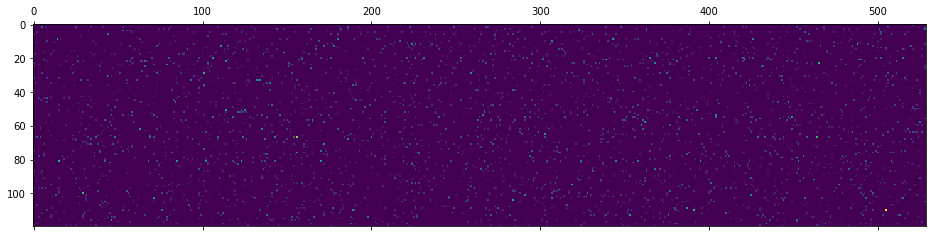

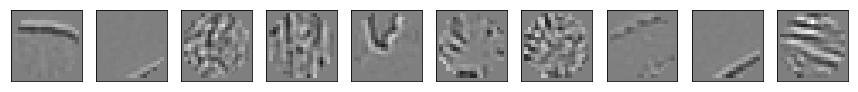

number of codes, size of reconstructed images =  (4096, 441)


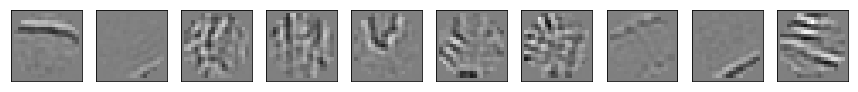

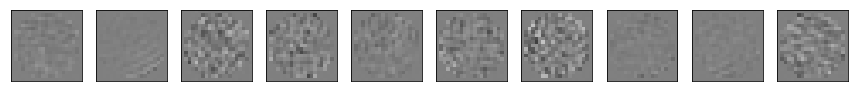

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  -0.0003094697266766164 +/- 0.003802364944522757
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  -0.0003094697266766164 +/- 0.0928286144813855
average energy of residual =  0.08613767271064962 +/- 0.034605617723693805
median energy of residual =  0.08589615720350305
average gain of coding =  2.293107870296951 +/- 0.41929054069915456
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.031917458486709224
average std of codewords =  0.1625318273646943
l0-sparseness of codewords =  0.05458227492911153
std of the average of individual patches =  0.0039020483633449353


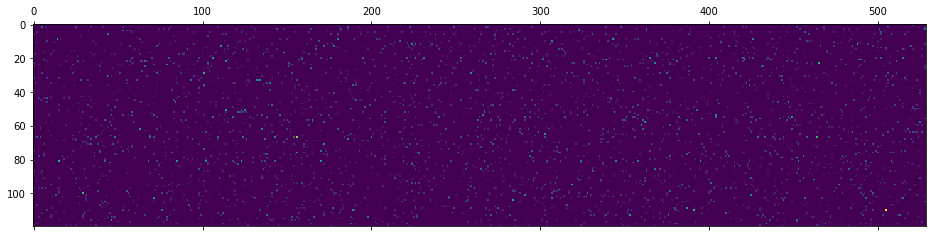

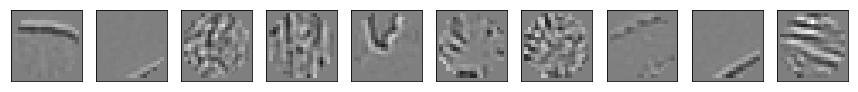

number of codes, size of reconstructed images =  (4096, 441)


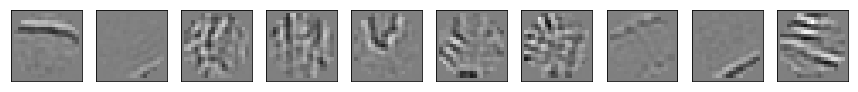

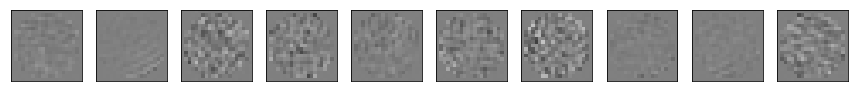

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  -0.0003094697266766161 +/- 0.003802364944522757
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  -0.0003094697266766161 +/- 0.09282861448138552
average energy of residual =  0.08613767271064963 +/- 0.034605617723693805
median energy of residual =  0.08589615720350306
average gain of coding =  2.293107870296951 +/- 0.41929054069915456
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.02414034345307503
average std of codewords =  0.14994345436995918
l0-sparseness of codewords =  0.04648179052457467
std of the average of individual patches =  0.023439308597971442


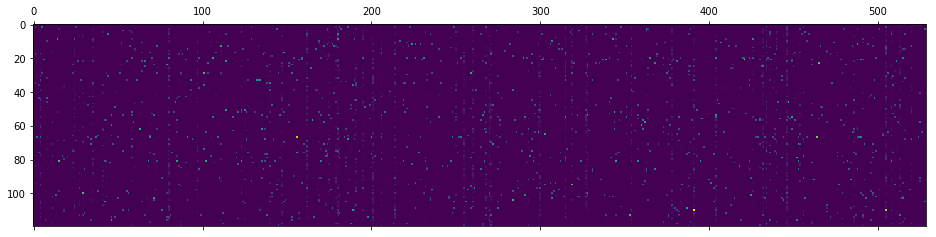

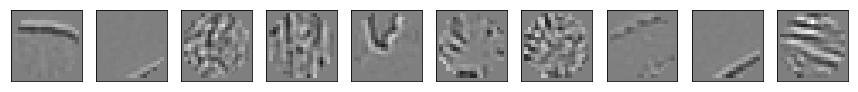

number of codes, size of reconstructed images =  (4096, 441)


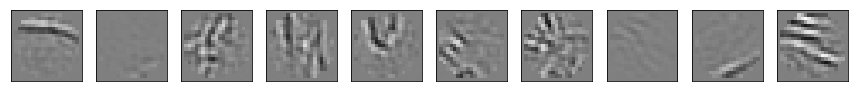

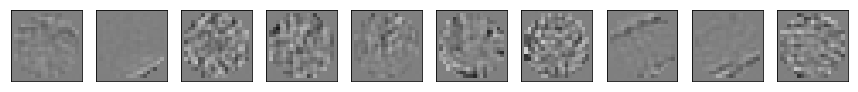

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  -0.0003477804902681241 +/- 0.004434654241879956
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  -0.0003477804902681241 +/- 0.12046564476026435
average energy of residual =  0.11594262054276096 +/- 0.03270170118591641
median energy of residual =  0.1191759954737288
average gain of coding =  1.6311093903257246 +/- 0.2933729199285777
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.03190711525040984
average std of codewords =  0.16266048235884367
l0-sparseness of codewords =  0.05458504400992439
std of the average of individual patches =  0.003484182292652491


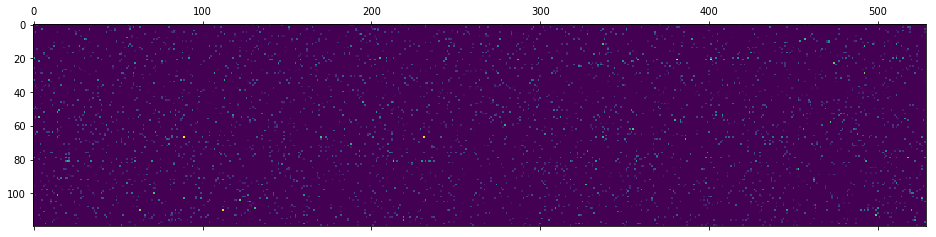

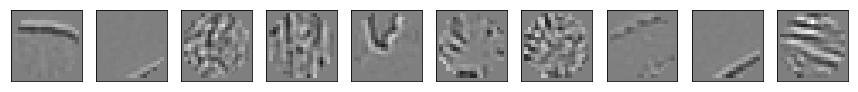

number of codes, size of reconstructed images =  (4096, 441)


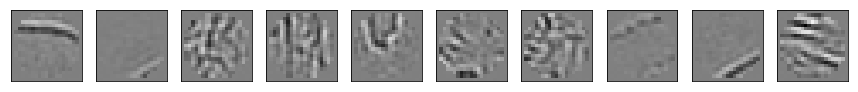

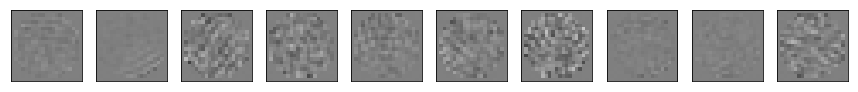

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  -0.00011553596253326919 +/- 0.0038428969639051807
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  -0.00011553596253326919 +/- 0.0925589383886496
average energy of residual =  0.08590954542480943 +/- 0.034448808819683076
median energy of residual =  0.0853017765266077
average gain of coding =  2.299493830620123 +/- 0.4210076235020839
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.03190711525040984
average std of codewords =  0.16266048235884364
l0-sparseness of codewords =  0.05458504400992439
std of the average of individual patches =  0.003484182292652491


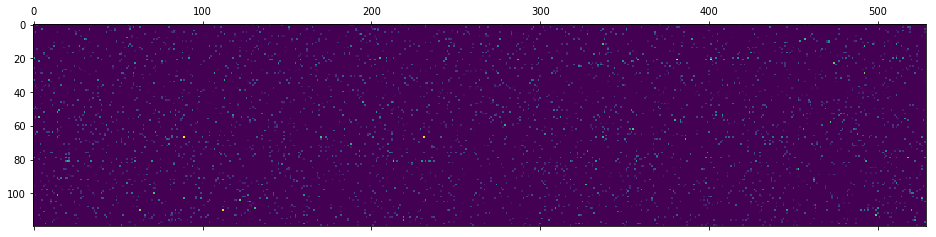

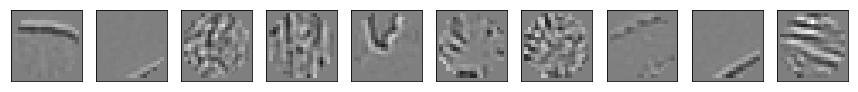

number of codes, size of reconstructed images =  (4096, 441)


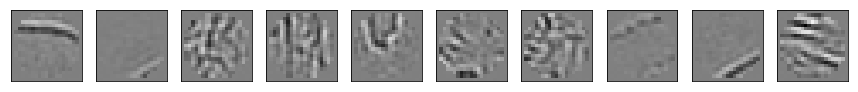

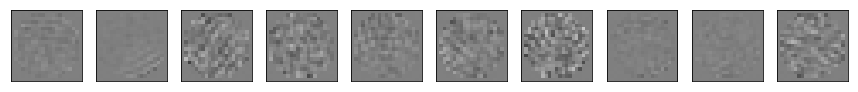

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  -0.0001155359625332689 +/- 0.0038428969639051807
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  -0.0001155359625332689 +/- 0.0925589383886496
average energy of residual =  0.08590954542480943 +/- 0.034448808819683076
median energy of residual =  0.0853017765266077
average gain of coding =  2.299493830620123 +/- 0.4210076235020839
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.029123007962119533
average std of codewords =  0.15940880704842533
l0-sparseness of codewords =  0.05172273747637051
std of the average of individual patches =  0.012322868307127572


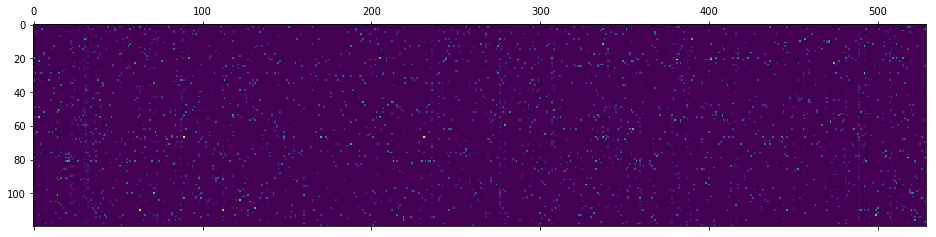

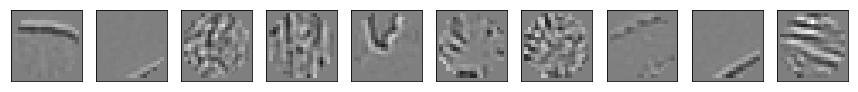

number of codes, size of reconstructed images =  (4096, 441)


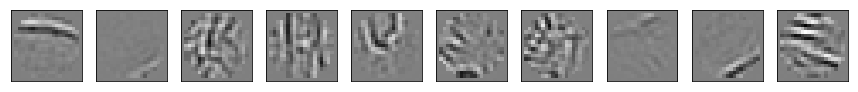

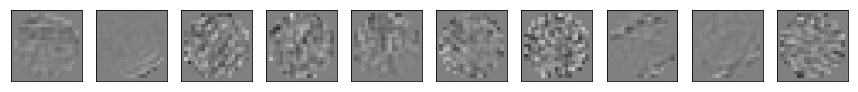

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  -0.0002933212106005154 +/- 0.0040706961443174325
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  -0.0002933212106005154 +/- 0.10094984025076198
average energy of residual =  0.09647778179220544 +/- 0.029715213350109834
median energy of residual =  0.09695884287216439
average gain of coding =  1.9677037313082613 +/- 0.33293170928929494
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.03187840225790259
average std of codewords =  0.16245255078548448
l0-sparseness of codewords =  0.054570275578922495
std of the average of individual patches =  0.0031597889937283645


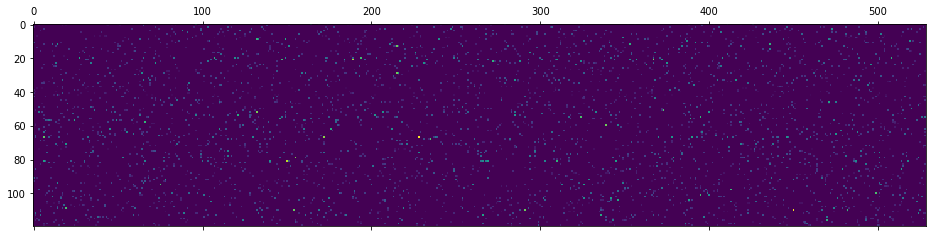

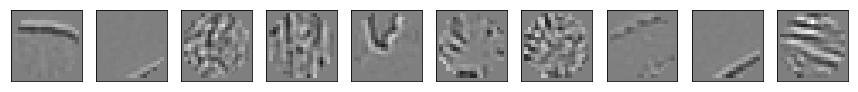

number of codes, size of reconstructed images =  (4096, 441)


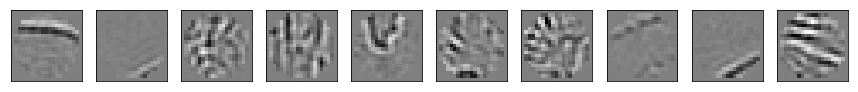

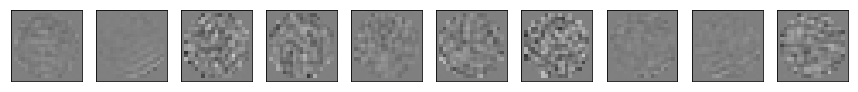

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  6.6257509928927035e-06 +/- 0.003945027437319482
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  6.6257509928927035e-06 +/- 0.09300665911688955
average energy of residual =  0.08626216992213989 +/- 0.03477178057433555
median energy of residual =  0.08638486261956314
average gain of coding =  2.2910516422263347 +/- 0.4201251630856339
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.03187840225790259
average std of codewords =  0.16245255078548448
l0-sparseness of codewords =  0.054570275578922495
std of the average of individual patches =  0.003159788993728365


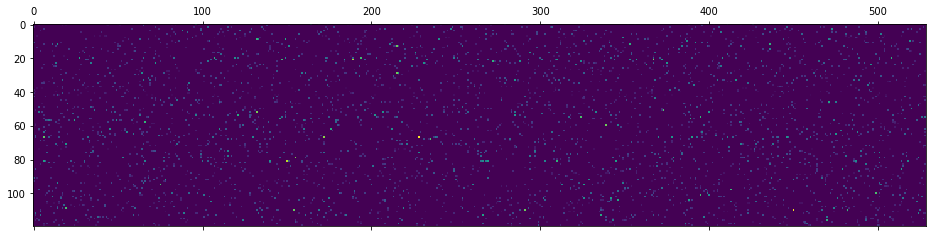

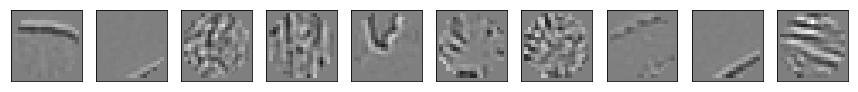

number of codes, size of reconstructed images =  (4096, 441)


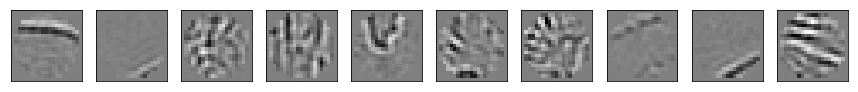

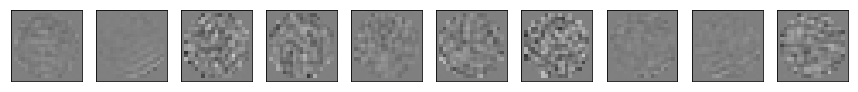

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  6.625750992892585e-06 +/- 0.003945027437319482
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  6.625750992892585e-06 +/- 0.09300665911688955
average energy of residual =  0.08626216992213989 +/- 0.03477178057433555
median energy of residual =  0.08638486261956316
average gain of coding =  2.2910516422263347 +/- 0.4201251630856339
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.03159579922760752
average std of codewords =  0.1621648551362826
l0-sparseness of codewords =  0.05444474391540643
std of the average of individual patches =  0.004224999670034412


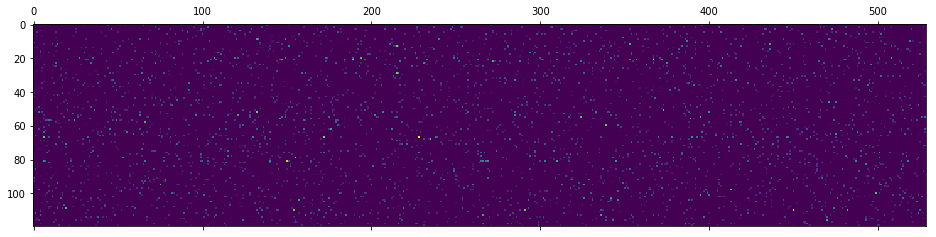

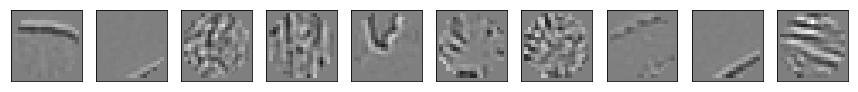

number of codes, size of reconstructed images =  (4096, 441)


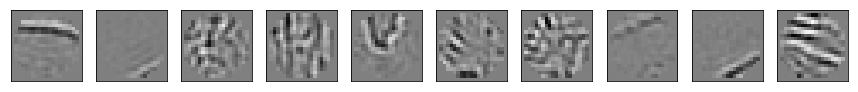

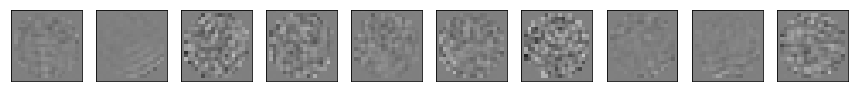

average of data patches =  -7.89752670459092e-05 +/- 0.004867137808471049
average of residual patches =  -0.00013594801439578404 +/- 0.0039769546408153335
median energy of data =  0.19067788328947594
average energy of data =  0.1909938645300175 +/- 0.06987009086401882
average error =  -0.00013594801439578404 +/- 0.09381194776137608
average energy of residual =  0.08754649188136908 +/- 0.03370922401822898
median energy of residual =  0.08690263189203186
average gain of coding =  2.229008542612453 +/- 0.3763793915551561


In [8]:
record_num_batches = 256
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(42*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(42*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [9]:
coding_gain

{'HAP': {'Hom': 1.9677037313082613,
  'Non': 2.299493830620123,
  'One': 2.299493830620123},
 'HEH': {'Hom': 2.229008542612453,
  'Non': 2.2910516422263347,
  'One': 2.2910516422263347},
 'None': {'Hom': 1.6311093903257246,
  'Non': 2.293107870296951,
  'One': 2.293107870296951}}

## Version used

In [10]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
Sat Mar 17 21:56:15 2018 CET